### Bioinfo Practice 1 - Term Project 

## **Figure4E**

**Cumulative distributions of ribosome density changes (alternative representation of D). The patterns for strong binders are clearly different from those with lower CLIP tag enrichment (p = 2.04 3 1010 between top 5% and 20%–50% interval and p < 10320 between top 5% and bottom 50%, Kolmogorov-Smirnov test).**

이제 이 그림을 그려 볼 것이다...!

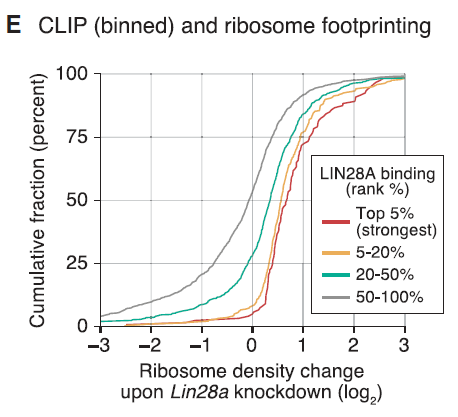

In [302]:
from IPython.display import Image
Image("Figure4E.PNG")

In [91]:
%cd /data/project/jihye/2021-1/BioinfoPractice1/TermProject/binfo1-datapack1

/data/project/jihye/2021-1/BioinfoPractice1/TermProject/binfo1-datapack1


In [ ]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam 

In [303]:
!ls

CLIP-35L33G.bam		  filtered-RPF-siLuc.bam
CLIP-35L33G.bam.bai	  fivepcounts-filtered-RPF-siLuc.txt
CLIP-35L33G.pileup	  fivepcounts-RPF-siLuc.bed
CLIP-let7d.bam		  gencode-exons-containing-startcodon.bed
CLIP-let7d-gene.bedgraph  gencode.gtf
CLIP-let7d-gene.pileup	  gencode-plusexon.gtf
CLIP-let7d.pileup	  gencode-start.gtf
CLIP-let7f.bam		  genomecov.png
CLIP-let7f-gene.bedgraph  read-counts.txt
CLIP-let7f-gene.pileup	  read-counts.txt.summary
CLIP-let7f.pileup	  RNA-control.bam
CLIP-let7g.bam		  RNA-control.bam.bai
CLIP-let7g-gene.bedgraph  RNA-siLin28a.bam
CLIP-let7g-gene.pileup	  RNA-siLin28a.bam.bai
CLIP-let7g.pileup	  RNA-siLuc.bam
describe.PNG		  RNA-siLuc.bam.bai
Figure4E.PNG		  RPF-siLin28a.bam
FigureS2A.PNG		  RPF-siLin28a.bam.bai
FigureS2D.PNG		  RPF-siLuc.bam
FigureS5A.PNG		  RPF-siLuc.bam.bai


In [310]:
from pandas.core.common import SettingWithCopyWarning

In [311]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#')
cnts

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842
55355,ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,61,30,25,18,19
55356,ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329
55357,ENSMUSG00000064371.1,chrM,15289,15355,+,67,185,10,15,25,5257,3947


In [312]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['ribosome_density_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])

cnts['log2_rden_change'] = np.log2(cnts['ribosome_density_change'])
cnts

/data/project/jihye/anaconda3/lib/python3.8/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
0,ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN,NaN
1,ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN,NaN
2,ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.000000,NaN,NaN
3,ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN,NaN
4,ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,0.337745
55355,ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474,-0.341037
55356,ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,0.176708
55357,ENSMUSG00000064371.1,chrM,15289,15355,+,67,185,10,15,25,5257,3947,18.500000,2.219829,1.150449


In [313]:
# Nan이나 inf -inf가 있는 행 제거
import numpy as np
cnts = cnts[~cnts.isin([np.nan, np.inf, -np.inf]).any(1)]
cnts

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
15,ENSMUSG00000102343.2,chr1;chr1;chr1;chr1;chr1,3975962;4054448;4055383;4055383;4056370,3976357;4054521;4056207;4055574;4056438,-;-;-;-;-,1364,67,31,207,157,1,2,2.161290,0.379227,-1.398866
19,ENSMUSG00000025902.14,chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;chr1;c...,4561154;4561473;4561613;4561936;4562680;456268...,4562891;4562886;4562891;4562891;4563827;456289...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4772,6,1,8,5,2,3,6.000000,0.416667,-1.263034
21,ENSMUSG00000102269.2,chr1;chr1,4593128;4594669,4593826;4596960,+;+,2991,8,73,28,11,2,9,0.109589,0.087302,-3.517848
26,ENSMUSG00000098104.2,chr1,4758157,4759626,-,1470,29,63,26,15,2,7,0.460317,0.164835,-2.600904
30,ENSMUSG00000103922.2,chr1,4841354,4842422,+,1069,183,95,93,100,42,75,1.926316,0.602151,-0.731804
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55354,ENSMUSG00000064368.1,chrM,13552,14070,-,519,1666,1976,6741,8052,11471,10842,0.843117,1.263780,0.337745
55355,ENSMUSG00000064369.1,chrM,14071,14139,-,69,81,61,30,25,18,19,1.327869,0.789474,-0.341037
55356,ENSMUSG00000064370.1,chrM,14145,15288,+,1144,403,4561,11885,10971,13872,11329,0.088358,1.130302,0.176708
55357,ENSMUSG00000064371.1,chrM,15289,15355,+,67,185,10,15,25,5257,3947,18.500000,2.219829,1.150449


In [314]:
# LIN28A binding rank를 구하기 위해 clip_enrichment를 내림차순으로 나열
cnts.sort_values(by=['clip_enrichment'], axis=0, ascending=False, inplace=True)
cnts

<ipython-input-314-770a20d17723>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts.sort_values(by=['clip_enrichment'], axis=0, ascending=False, inplace=True)


,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
33306,ENSMUSG00000064899.3,chr11,68964253,68964387,+,135,2667,1,5,4,22,31,2667.000000,0.567742,-0.816693
55335,ENSMUSG00000064349.1,chrM,5192,5257,-,66,12731,12,68,87,788,712,1060.916667,1.415978,0.501799
55347,ENSMUSG00000064361.1,chrM,9808,9875,+,68,1025,2,11,13,120,104,512.500000,1.363636,0.447459
55351,ENSMUSG00000064365.1,chrM,11613,11671,+,59,482,1,56,51,1424,1341,482.000000,0.967082,-0.048290
37944,ENSMUSG00000058773.3,chr13,21964053,21964795,-,743,2297,8,6,2,4653,9033,287.125000,0.171704,-2.542007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15523,ENSMUSG00000105189.2,chr5,126103005,126103537,-,533,0,13,5,1,4,4,0.000000,0.200000,-2.321928
39685,ENSMUSG00000078302.6,chr13,98490750,98495813,+,5064,0,1,2,1,2,2,0.000000,0.500000,-1.000000
35946,ENSMUSG00000058669.8,chr12;chr12,56658174;56659697,56659064;56660069,-;-,1264,0,2,15,9,26,32,0.000000,0.487500,-1.036526
51365,ENSMUSG00000079871.5,chrX,12518542,12518901,+,360,0,4,12,21,38,20,0.000000,3.325000,1.733354


In [315]:
# clip_enrichment가 0인 행 삭제
cnts.drop(cnts.loc[cnts['clip_enrichment']==0].index, inplace=True)
cnts

/data/project/jihye/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
33306,ENSMUSG00000064899.3,chr11,68964253,68964387,+,135,2667,1,5,4,22,31,2667.000000,0.567742,-0.816693
55335,ENSMUSG00000064349.1,chrM,5192,5257,-,66,12731,12,68,87,788,712,1060.916667,1.415978,0.501799
55347,ENSMUSG00000064361.1,chrM,9808,9875,+,68,1025,2,11,13,120,104,512.500000,1.363636,0.447459
55351,ENSMUSG00000064365.1,chrM,11613,11671,+,59,482,1,56,51,1424,1341,482.000000,0.967082,-0.048290
37944,ENSMUSG00000058773.3,chr13,21964053,21964795,-,743,2297,8,6,2,4653,9033,287.125000,0.171704,-2.542007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39284,ENSMUSG00000114054.2,chr13,70570610,70570900,-,291,1,227,1,2,3,4,0.004405,1.500000,0.584963
4533,ENSMUSG00000087701.5,chr2,51761138,51761630,-,493,1,253,16,5,2,2,0.003953,0.312500,-1.678072
32563,ENSMUSG00000081076.4,chr11,32988816,32989703,-,888,1,289,18,13,8,12,0.003460,0.481481,-1.054448
10149,ENSMUSG00000068240.6,chr4,3973092,3973595,-,504,1,466,368,184,2873,3012,0.002146,0.476926,-1.068164


In [316]:
# rank 부여를 위해 순서 별로 clip_enrichment 양 확인
cnts.describe()

# min~75%까지도 값이 3.33 이하라니......... 싶어서 10보다 작은 값은 다 쳐내기로 결심함

,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
count,16201.000000,1.620100e+04,16201.000000,16201.000000,16201.000000,1.620100e+04,1.620100e+04,16201.000000,16201.000000,16201.000000
mean,4785.432875,8.303811e+02,314.025554,756.654342,597.854145,6.526248e+02,7.899652e+02,3.484435,0.773757,-0.794472
std,4229.197633,1.937977e+04,1231.135900,2639.537473,2452.975293,3.694482e+04,4.348563e+04,24.337612,1.178029,1.007934
min,57.000000,1.000000e+00,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,0.001281,0.012821,-6.285402
25%,2096.000000,3.000000e+01,20.000000,31.000000,23.000000,1.000000e+01,1.200000e+01,0.889908,0.392322,-1.349890
50%,3880.000000,1.380000e+02,95.000000,204.000000,154.000000,6.200000e+01,8.200000e+01,1.738351,0.562919,-0.829001
75%,6325.000000,5.540000e+02,303.000000,734.000000,567.000000,2.430000e+02,3.420000e+02,3.333333,0.833333,-0.263034
max,123179.000000,2.451339e+06,119734.000000,214518.000000,237513.000000,4.698218e+06,5.531458e+06,2667.000000,64.000000,6.000000


### **(1) 일단 clip enrichment가 10 이하인 것만 그려보자**

In [317]:
# clip_enrichment가 10 이하인 것 개수 확인
cnts[cnts['clip_enrichment']<=10]

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
40638,ENSMUSG00000021884.19,chr14;chr14;chr14;chr14;chr14;chr14;chr14;chr1...,31320687;31322153;31329156;31329622;31329924;3...,31321609;31322279;31330000;31329752;31330000;3...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,4945,90,9,61,15,19,20,10.000000,0.233607,-2.097847
19400,ENSMUSG00000118635.2,chr7;chr7,3562452;3563644,3562744;3563881,-;-,531,20,2,2,2,1,1,10.000000,1.000000,0.000000
1478,ENSMUSG00000026241.6,chr1;chr1;chr1,86594013;86597366;86598071,86594520;86597676;86598293,-;-;-,1042,30,3,1,1,8,6,10.000000,1.333333,0.415037
6730,ENSMUSG00000109780.2,chr2;chr2;chr2,160951331;160954024;160955608,160951748;160954239;160956778,+;+;+,1805,10,1,2,6,3,2,10.000000,4.500000,2.169925
20913,ENSMUSG00000085105.3,chr7;chr7;chr7,33933802;33933866;33935577,33933920;33934977;33939632,+;+;+,5232,20,2,18,5,3,1,10.000000,0.833333,-0.263034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39284,ENSMUSG00000114054.2,chr13,70570610,70570900,-,291,1,227,1,2,3,4,0.004405,1.500000,0.584963
4533,ENSMUSG00000087701.5,chr2,51761138,51761630,-,493,1,253,16,5,2,2,0.003953,0.312500,-1.678072
32563,ENSMUSG00000081076.4,chr11,32988816,32989703,-,888,1,289,18,13,8,12,0.003460,0.481481,-1.054448
10149,ENSMUSG00000068240.6,chr4,3973092,3973595,-,504,1,466,368,184,2873,3012,0.002146,0.476926,-1.068164


In [320]:
# clip_enrichment가 10 이하인 행 삭제
under10 = cnts.drop(cnts.loc[cnts['clip_enrichment']<=10].index)
under10

,Geneid,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
33306,ENSMUSG00000064899.3,chr11,68964253,68964387,+,135,2667,1,5,4,22,31,2667.000000,0.567742,-0.816693
55335,ENSMUSG00000064349.1,chrM,5192,5257,-,66,12731,12,68,87,788,712,1060.916667,1.415978,0.501799
55347,ENSMUSG00000064361.1,chrM,9808,9875,+,68,1025,2,11,13,120,104,512.500000,1.363636,0.447459
55351,ENSMUSG00000064365.1,chrM,11613,11671,+,59,482,1,56,51,1424,1341,482.000000,0.967082,-0.048290
37944,ENSMUSG00000058773.3,chr13,21964053,21964795,-,743,2297,8,6,2,4653,9033,287.125000,0.171704,-2.542007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45380,ENSMUSG00000055447.20,chr16;chr16;chr16;chr16;chr16;chr16;chr16;chr1...,49620896;49623442;49624160;49628369;49675729;4...,49620960;49623508;49624688;49628507;49675760;4...,+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;+;...,6276,171,17,86,39,142,98,10.058824,0.657095,-0.605825
800,ENSMUSG00000026097.10,chr1;chr1;chr1;chr1;chr1;chr1,53336254;53336254;53338131;53338131;53344614;5...,53336347;53336347;53341112;53338311;53344765;5...,+;+;+;+;+;+,4711,804,80,217,246,45,33,10.050000,1.545873,0.628422
10135,ENSMUSG00000028232.14,chr4;chr4;chr4;chr4;chr4;chr4;chr4;chr4;chr4;c...,3549041;3549041;3550328;3551752;3551752;355175...,3550579;3550579;3550579;3551891;3552157;355189...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,3462,492,49,123,141,124,83,10.040816,1.712607,0.776194
5564,ENSMUSG00000027175.11,chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;chr2;c...,104487633;104508362;104510325;104514439;104514...,104487883;104512303;104512303;104514611;104514...,-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;-;...,6877,371,37,99,70,43,69,10.027027,0.440638,-1.182333


In [321]:
under10.describe()

,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
count,695.000000,6.950000e+02,695.000000,695.00000,695.000000,6.950000e+02,6.950000e+02,695.000000,695.000000,695.000000
mean,5020.523741,4.897637e+03,264.677698,585.02446,576.379856,7.337397e+03,8.553180e+03,30.661095,1.237851,-0.305019
std,7112.958753,9.303621e+04,4547.832546,8176.75320,9030.396147,1.782071e+05,2.098097e+05,113.867641,1.622089,1.341816
min,59.000000,1.100000e+01,1.000000,1.00000,1.000000,1.000000e+00,1.000000e+00,10.024390,0.025000,-5.321928
25%,1113.500000,3.500000e+01,2.000000,7.00000,6.000000,3.000000e+00,4.000000e+00,11.924923,0.501927,-0.994453
50%,3464.000000,1.210000e+02,5.000000,19.00000,16.000000,1.600000e+01,1.400000e+01,14.700000,0.899608,-0.152632
75%,6806.500000,6.590000e+02,34.500000,110.50000,88.500000,1.865000e+02,1.680000e+02,23.721429,1.333333,0.415037
max,117334.000000,2.451339e+06,119734.000000,214518.00000,237513.000000,4.698218e+06,5.531458e+06,2667.000000,22.000000,4.459432


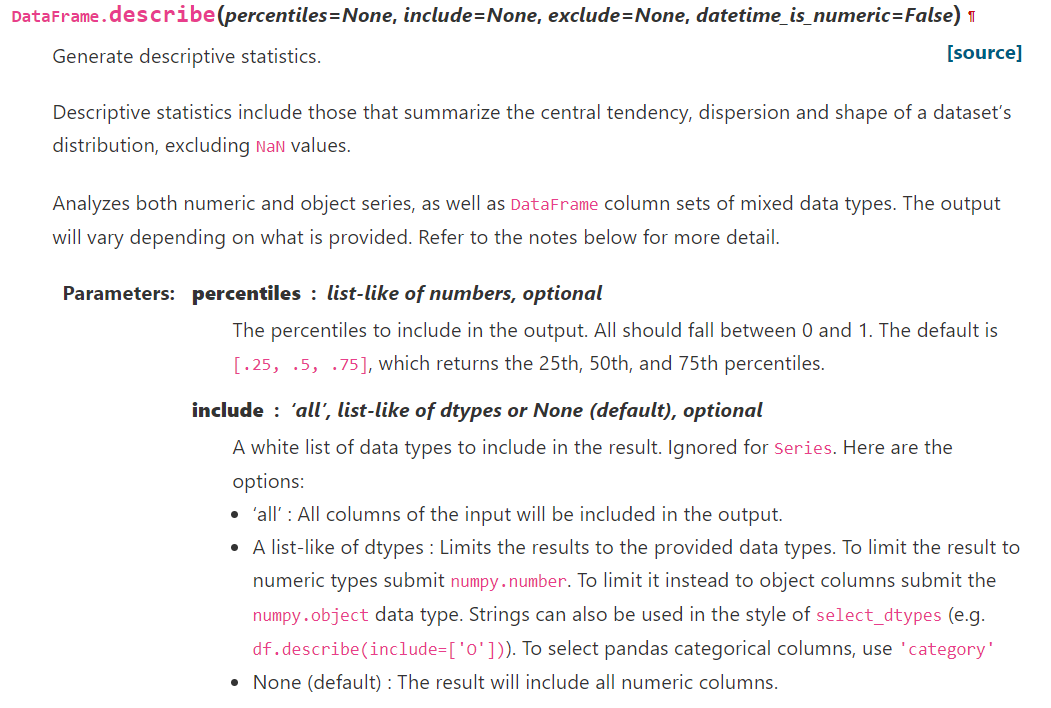

In [290]:
from IPython.display import Image
Image("describe.PNG")

In [322]:
# 상위 5%, 20%, 50 나오게 출력
under10['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')

count     695.000000
mean       30.661095
std       113.867641
min        10.024390
50%        14.700000
80%        28.000000
95%        76.950000
max      2667.000000
Name: clip_enrichment, dtype: float64

In [323]:
df = under10

def assign_rank_group(clip):
    
    global df
    
    top5 = float(df['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')['95%'])
    top20 = float(df['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')['80%'])
    top50 = float(df['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')['50%'])
    
    if clip >= top5:
        return 'Top 5% (strongest)'
    elif clip >= top20:
        return '5-20%'
    elif clip >= top50:
        return '20-50%'
    else:
        return '50-100%'

In [324]:
under10['rank_group'] = under10['clip_enrichment'].apply(assign_rank_group)

In [325]:
under10[['clip_enrichment','rank_group']]

,clip_enrichment,rank_group
33306,2667.000000,Top 5% (strongest)
55335,1060.916667,Top 5% (strongest)
55347,512.500000,Top 5% (strongest)
55351,482.000000,Top 5% (strongest)
37944,287.125000,Top 5% (strongest)
...,...,...
45380,10.058824,50-100%
800,10.050000,50-100%
10135,10.040816,50-100%
5564,10.027027,50-100%


In [326]:
under10.groupby('rank_group').mean()

,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,ribosome_density_change,log2_rden_change
rank_group,,,,,,,,,,
20-50%,4958.548077,12826.096154,636.283654,1212.677885,1315.730769,22984.711538,27019.134615,19.458105,1.249408,-0.390098
5-20%,2682.152381,450.676190,10.514286,36.523810,34.057143,522.495238,723.685714,42.339635,1.484898,-0.203590
50-100%,6117.429395,1707.573487,143.319885,425.201729,346.809798,550.458213,457.884726,12.038339,1.140907,-0.286400
Top 5% (strongest),1528.914286,2748.028571,21.942857,85.000000,85.514286,2080.000000,2560.200000,246.834560,1.389153,-0.288288


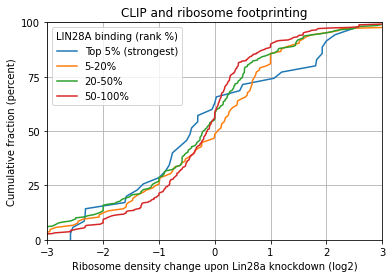

In [327]:
import matplotlib.pyplot as plt

group1 = under10[ under10['rank_group']=='Top 5% (strongest)']
group2 = under10[ under10['rank_group']=='5-20%']
group3 = under10[ under10['rank_group']=='20-50%']
group4 = under10[ under10['rank_group']=='50-100%']

x1 = np.sort(group1['log2_rden_change'])
y1 = np.array(range(len(group1)))/len(group1) * 100
plt.plot(x1, y1, label='Top 5% (strongest)')

x2 = np.sort(group2['log2_rden_change'])
y2 = np.array(range(len(group2)))/len(group2) * 100
plt.plot(x2, y2, label='5-20%')

x3 = np.sort(group3['log2_rden_change'])
y3 = np.array(range(len(group3)))/len(group3) * 100
plt.plot(x3, y3, label='20-50%')

x4 = np.sort(group4['log2_rden_change'])
y4 = np.array(range(len(group4)))/len(group4) * 100
plt.plot(x4, y4, label='50-100%')

plt.title("CLIP and ribosome footprinting")
plt.grid()
plt.xlabel('Ribosome density change upon Lin28a knockdown (log2)')
plt.ylabel('Cumulative fraction (percent)')
plt.axis([-3, 3, 0, 100])
plt.yticks([0, 25, 50, 75, 100])

plt.legend(title='LIN28A binding (rank %)')
plt.show()

### **(2) 전체 cnts 데이터를 다 사용해서도 한 번 그려보자**

In [328]:
# 상위 5%, 20%, 50% 나오게 출력
cnts['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')

count    16201.000000
mean         3.484435
std         24.337612
min          0.001281
50%          1.738351
80%          3.979167
95%          9.280000
max       2667.000000
Name: clip_enrichment, dtype: float64

In [329]:
df = cnts

def assign_rank_group(clip):
    
    global df
    
    top5 = float(df['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')['95%'])
    top20 = float(df['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')['80%'])
    top50 = float(df['clip_enrichment'].describe(percentiles=[0.5, 0.80, 0.95], include='all')['50%'])
    
    if clip >= top5:
        return 'Top 5% (strongest)'
    elif clip >= top20:
        return '5-20%'
    elif clip >= top50:
        return '20-50%'
    else:
        return '50-100%'

In [330]:
cnts['rank_group'] = cnts['clip_enrichment'].apply(assign_rank_group)
cnts[['clip_enrichment','rank_group']]

<ipython-input-330-5c266af754dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cnts['rank_group'] = cnts['clip_enrichment'].apply(assign_rank_group)


,clip_enrichment,rank_group
33306,2667.000000,Top 5% (strongest)
55335,1060.916667,Top 5% (strongest)
55347,512.500000,Top 5% (strongest)
55351,482.000000,Top 5% (strongest)
37944,287.125000,Top 5% (strongest)
...,...,...
39284,0.004405,50-100%
4533,0.003953,50-100%
32563,0.003460,50-100%
10149,0.002146,50-100%


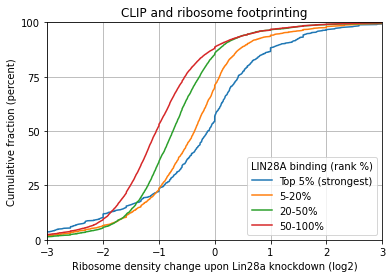

In [336]:
import matplotlib.pyplot as plt

group1 = cnts[ cnts['rank_group']=='Top 5% (strongest)']
group2 = cnts[ cnts['rank_group']=='5-20%']
group3 = cnts[ cnts['rank_group']=='20-50%']
group4 = cnts[ cnts['rank_group']=='50-100%']

x1 = np.sort(group1['log2_rden_change'])
y1 = np.array(range(len(group1)))/len(group1) * 100
plt.plot(x1, y1, label='Top 5% (strongest)')

x2 = np.sort(group2['log2_rden_change'])
y2 = np.array(range(len(group2)))/len(group2) * 100
plt.plot(x2, y2, label='5-20%')

x3 = np.sort(group3['log2_rden_change'])
y3 = np.array(range(len(group3)))/len(group3) * 100
plt.plot(x3, y3, label='20-50%')

x4 = np.sort(group4['log2_rden_change'])
y4 = np.array(range(len(group4)))/len(group4) * 100
plt.plot(x4, y4, label='50-100%')

plt.title("CLIP and ribosome footprinting")

plt.grid()
plt.xlabel('Ribosome density change upon Lin28a knockdown (log2)')
plt.ylabel('Cumulative fraction (percent)')
plt.axis([-3, 3, 0, 100])
plt.yticks([0, 25, 50, 75, 100])

plt.legend(title='LIN28A binding (rank %)')